In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/pva97nk_modified.csv')
df.head()

,TARGET_B,ID,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,0,0.0,0,0,0,0,0,1,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,85,0.0,0,0,0,0,0,1,0,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,36,38750.0,0,0,0,0,1,1,1,0
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,27,38942.0,1,0,0,0,0,1,1,0
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,37,71509.0,0,1,0,0,0,1,1,0


## **Missing Values**

* Check the fraction of missing.
* Create missing value indicator and use those as predictors
* if variables has > 50% missing consider deleting it.

In [2]:
## check on missing
df.isna().sum()

,0
TARGET_B,0
ID,0
TARGET_D,4843
GiftCnt36,0
GiftCntAll,0
GiftCntCard36,0
GiftCntCardAll,0
GiftAvgLast,0
GiftAvg36,0
GiftAvgAll,0


In [3]:
## fraction missing
missing_values = df.isna().sum() / df.shape[0]  ## \ len(df)
missing_values

,0
TARGET_B,0.000000
ID,0.000000
TARGET_D,0.500000
GiftCnt36,0.000000
GiftCntAll,0.000000
GiftCntCard36,0.000000
GiftCntCardAll,0.000000
GiftAvgLast,0.000000
GiftAvg36,0.000000
GiftAvgAll,0.000000


In [7]:
## show the missing values
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace = True, ascending = True)
missing_values

,0
GiftAvgCard36,0.183770
DemAge,0.248503
TARGET_D,0.500000


In [8]:
## How to create a missing value indicator
## DemAge missing indicator = {1: if DemAge is missing, 0: if not}
## we want to use this indicator as a predictor
## You want to make indicators BEFORE imputing
from sklearn.impute import MissingIndicator

In [9]:
## if you have too many variables with missing values
## you can create missing value indicators for ALL
variable_missing_names = missing_values[missing_values >0].index + '_missing_indicator'

In [12]:
## instance of MissingIndicator
ind = MissingIndicator()

## .fit_transforms searches for missing values and creates the variable
## put it in a dataframe and attached the variable name
miss_ind = pd.DataFrame(ind.fit_transform(df).astype(int), columns = variable_missing_names)

In [14]:
miss_ind

,GiftAvgCard36_missing_indicator,DemAge_missing_indicator,TARGET_D_missing_indicator
0,1,0,1
1,1,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
9681,0,0,1
9682,1,0,1
9683,0,0,0
9684,1,1,1


In [15]:
## mean imputation for DemAge
df['DemAge'].fillna(df['DemAge'].mean(), inplace = True)

In [16]:
## KNN imputer
## nearest neighbor imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2)
## it looks at the age and Gift Avg and sees which observations have close values
## say we have 24 with missing Gift Avg
## 24, 25
df[['DemAge', 'GiftAvgCard36']] = pd.DataFrame(imputer.fit_transform(df[['DemAge', 'GiftAvgCard36']]))

In [17]:
## we have imputed Age with mean imputation
## KNN for Gift Avg Card
## RF can be used

## **Unusual Values**

* Be careful with mins and maxs (anomalies)

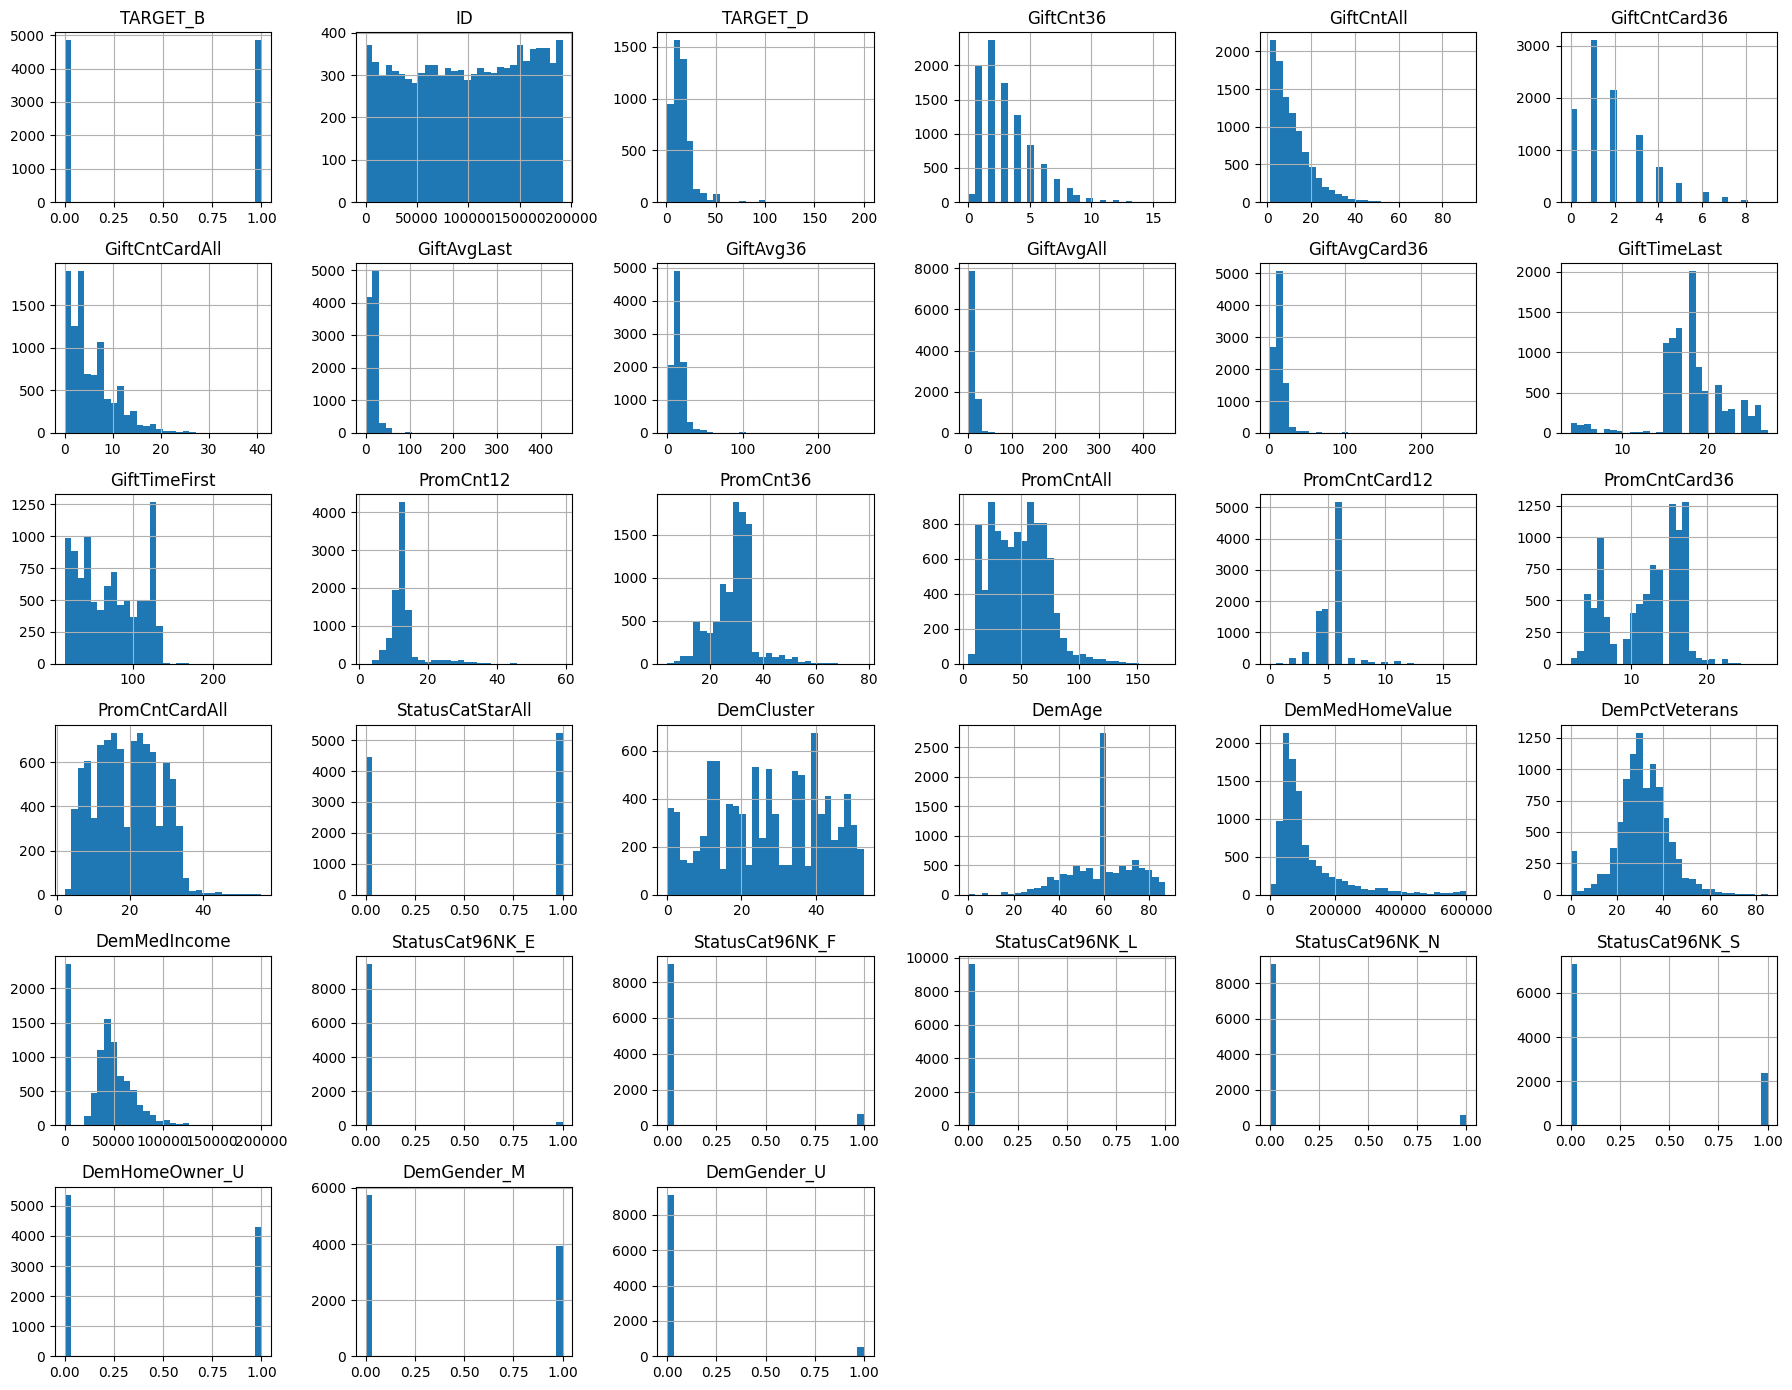

In [19]:
import matplotlib.pyplot as plt
df.hist(bins = 30, figsize = (18,14))
plt.tight_layout()
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_B,9686.0,0.500000,0.500026,0.00,0.00,0.500000,1.00,1.0
ID,9686.0,97975.474086,56550.171120,12.00,48835.50,99106.000000,148538.75,191779.0
TARGET_D,4843.0,15.624344,12.445137,1.00,10.00,13.000000,20.00,200.0
GiftCnt36,9686.0,3.205451,2.133421,0.00,2.00,3.000000,4.00,16.0
GiftCntAll,9686.0,10.507640,8.993401,1.00,4.00,8.000000,15.00,91.0
GiftCntCard36,9686.0,1.856597,1.595419,0.00,1.00,1.000000,3.00,9.0
GiftCntCardAll,9686.0,5.582490,4.736894,0.00,2.00,4.000000,8.00,41.0
GiftAvgLast,9686.0,16.017739,12.041805,0.00,10.00,15.000000,20.00,450.0
GiftAvg36,9686.0,14.876203,10.057007,0.00,9.60,13.500000,18.50,260.0
GiftAvgAll,9686.0,12.489325,9.209297,1.50,7.75,10.710000,15.00,450.0


In [ ]:
## it might be to set to missing AND impute than leave it at zero
## anomaly (160 years) - set value missing